# Doubler bettor

This notebook provides code on conducting Monte Carlo Simulation with double betting strategy (doubles bet after loss) described as a Roulette game.

In [1]:
import random
import matplotlib
import matplotlib.pyplot as plt

In [2]:
'''
Define a function, which will randomly generate an integer from the (1,100)
range. If that number is from the range [51,99] then you win, else you loose.
Comparing to the Roulette game, <51 can be considered as the black patterns,
[51,99] as the red, and 100 as the green one.
'''

def rollDice():
    roll = random.randint(1,100)
    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll > 50:
        return True

In [3]:
'''
Now let's use the function above to create a "Doubler bettor". The latter always
bets the same amount of money (bet_amount) for several periods (periods) if wins,
and doublet the bet amount in case of loosing.
'''

def doubler_bettor(budget,bet_amount,periods):
    value = budget
    bet = bet_amount
    X_axis = []
    Y_axis = []
    currentPeriod = 1

    # since we'll be doubling, we are interested in previous values
    # for the first period previousBet is considered win
    previousBet = 'win'
    # for the first period previousBetAmount is the bet_amount
    previousBetAmount = bet_amount

    while currentPeriod <= periods:
        # win case => bet the initial amount
        if previousBet == 'win':
            # which means we won the last round
            if rollDice():
                value += bet
                X_axis.append(currentPeriod)
                Y_axis.append(value)
            else:
                value -= bet
                previousBet = 'loss'
                previousBetAmount = bet
                X_axis.append(currentPeriod)
                Y_axis.append(value)
                if value < 0:
                    break
        # loss case => bet the doubled amount
        elif previousBet == 'loss':
            # which means we lost the last round
            if rollDice():
                bet = previousBetAmount * 2
                value += bet
                bet = bet_amount
                previousBet = 'win'
                X_axis.append(currentPeriod)
                Y_axis.append(value)
            else:
                bet = previousBetAmount * 2
                value -= bet
                if value < 0:
                    break
                previousBet = 'loss'
                previousBetAmount = bet
                X_axis.append(currentPeriod)
                Y_axis.append(value)
                if value < 0:
                    break

        currentPeriod += 1

    plt.plot(X_axis,Y_axis)

Please, input the number of periods 100


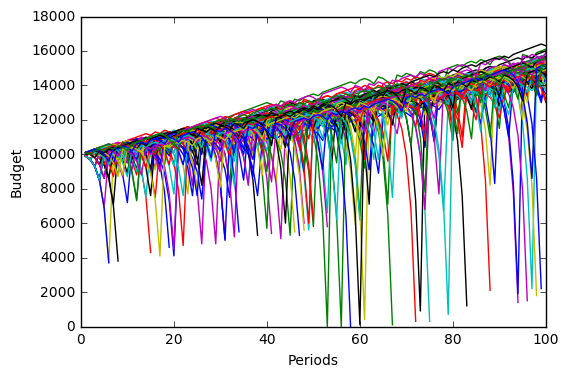

In [4]:
# now, apply the same strategy for several independent times,
# to get the monte carlo simulation plot
trials = input("Please, input the number of periods ")
x=0
while x < 100:
    doubler_bettor(10000,100,trials)
    x += 1
# add labels to the plot and show it
plt.ylabel('Budget')
plt.xlabel('Periods')
plt.show()